In [1]:
import tensorflow as tf

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

import numpy as np

from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Using TensorFlow backend.


In [2]:
df1 = pd.read_csv('X_data.csv')

df2 = pd.read_csv('Y_data.csv')

In [3]:
df1 = preprocessing.scale(df1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [5]:
model = Sequential()
model.add(Dense(13,input_shape=(30,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [6]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, callbacks = [earlystopper])

history_dict = history.history

Epoch 00081: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

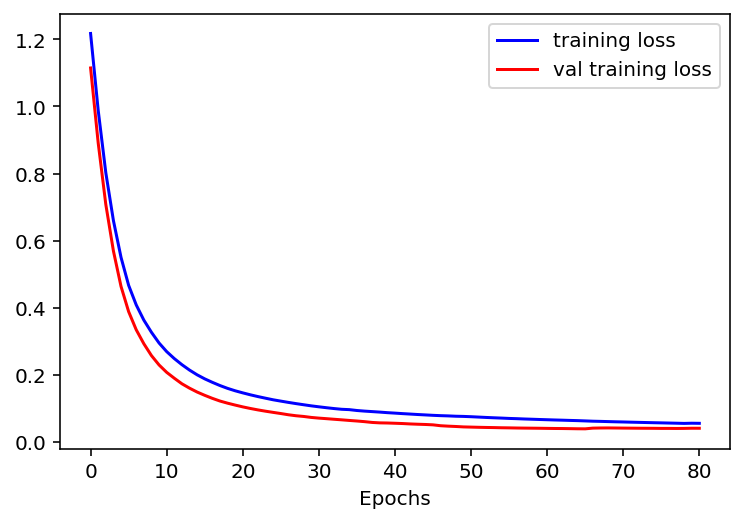

In [7]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

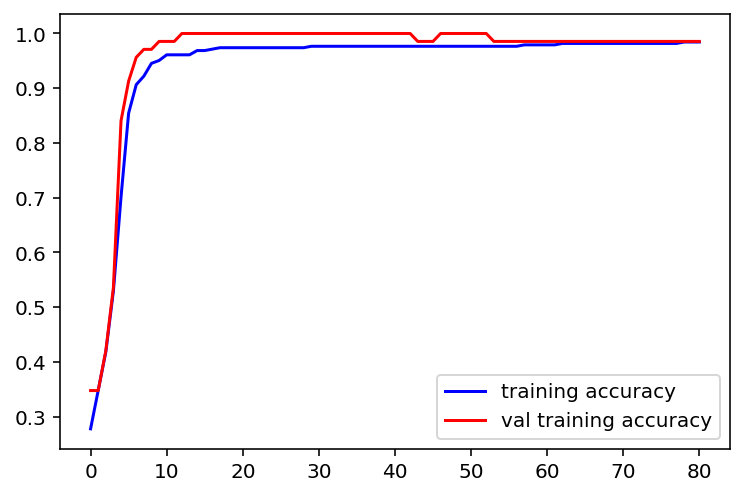

In [8]:
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.plot(accuracy_values,'b',label='training accuracy')
plt.plot(val_accuracy_values,'r',label='val training accuracy')
plt.legend()

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

114/114 [==============================] - 0s 70us/step
Test loss:  0.13480924841081887
Test accuracy:  0.9649122953414917


In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9788034188034187


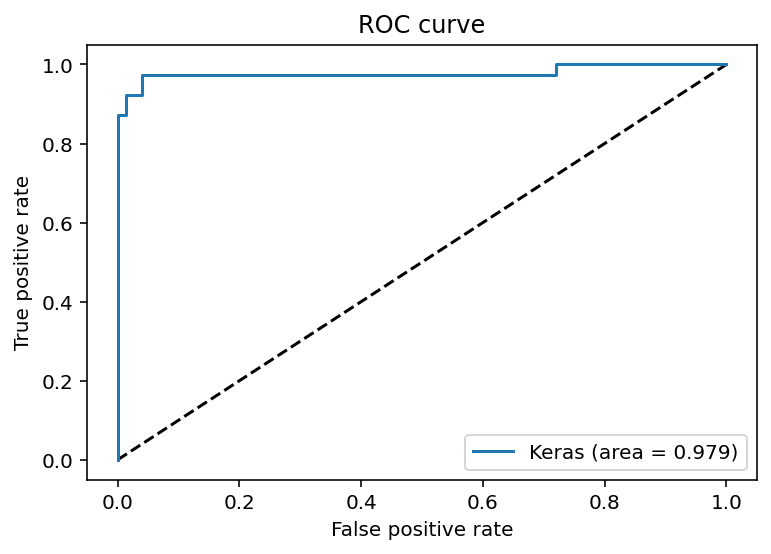

In [11]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [12]:
y_train_cat = to_categorical(y_train)

In [13]:
model = Sequential()
model.add(Dense(13,input_shape=(30,),activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

In [14]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

history = model.fit(X_train, y_train_cat, epochs = 2000, validation_split = 0.15, verbose = 0, callbacks = [earlystopper])

history_dict = history.history

Epoch 01165: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

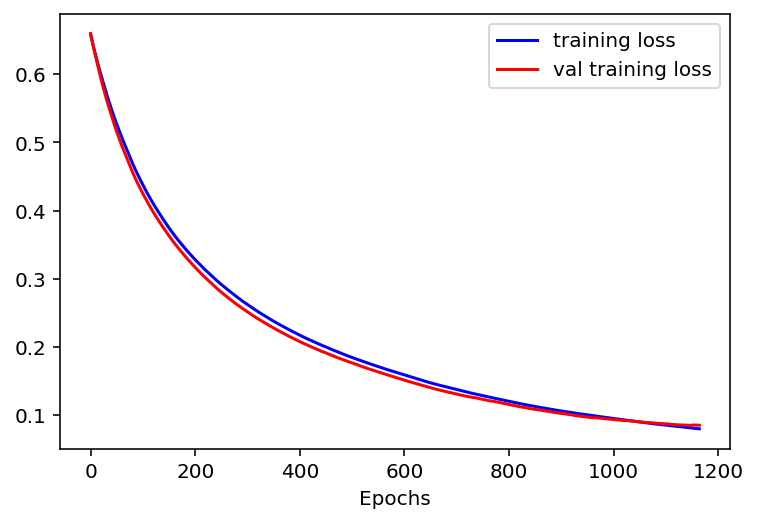

In [15]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

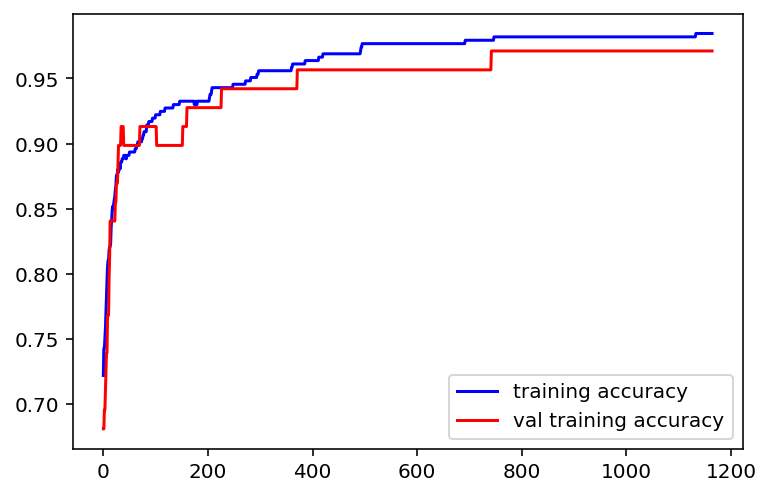

In [16]:
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.plot(accuracy_values,'b',label='training accuracy')
plt.plot(val_accuracy_values,'r',label='val training accuracy')
plt.legend()

In [17]:
y_test_cat = to_categorical(y_test)
loss, accuracy = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

114/114 [==============================] - 0s 61us/step
Test loss:  0.1513411261533436
Test accuracy:  0.9385964870452881


In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9788034188034188


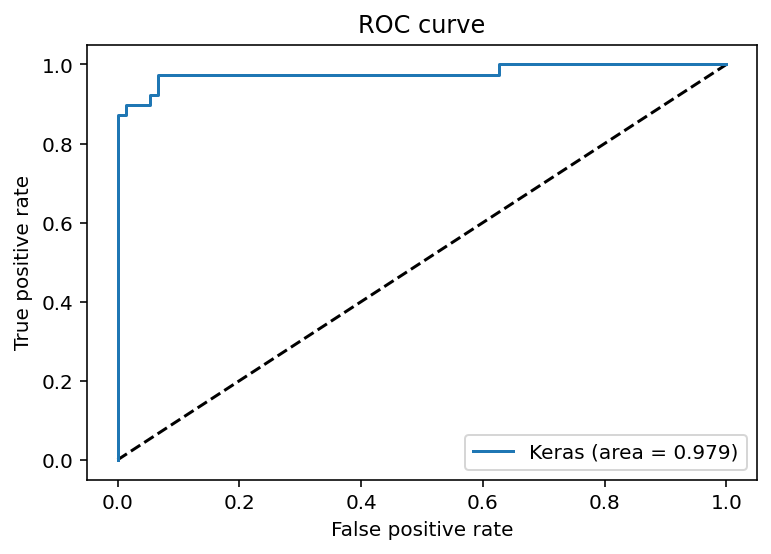

In [19]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [20]:
model = Sequential()
model.add(Dense(13,input_shape=(30,),activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics = ['accuracy'])

In [21]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

history = model.fit(X_train, y_train_cat, epochs = 3000, validation_split = 0.1, shuffle = True, verbose = 0, callbacks = [earlystopper])

history_dict = history.history

Epoch 01644: early stopping


Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

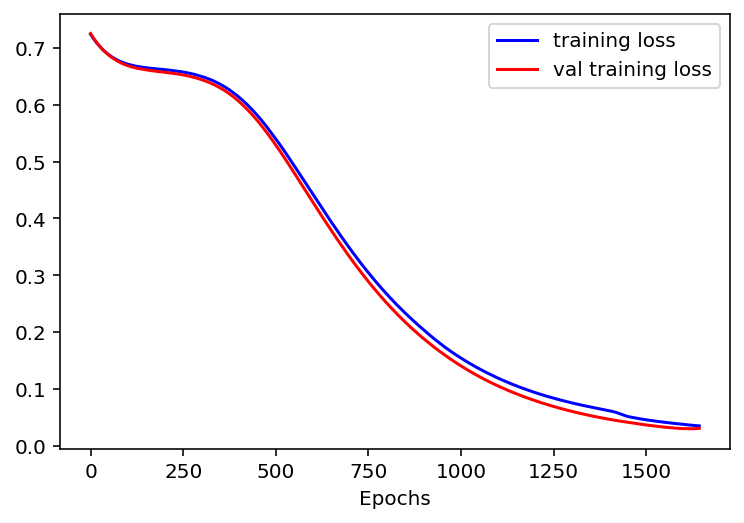

In [22]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

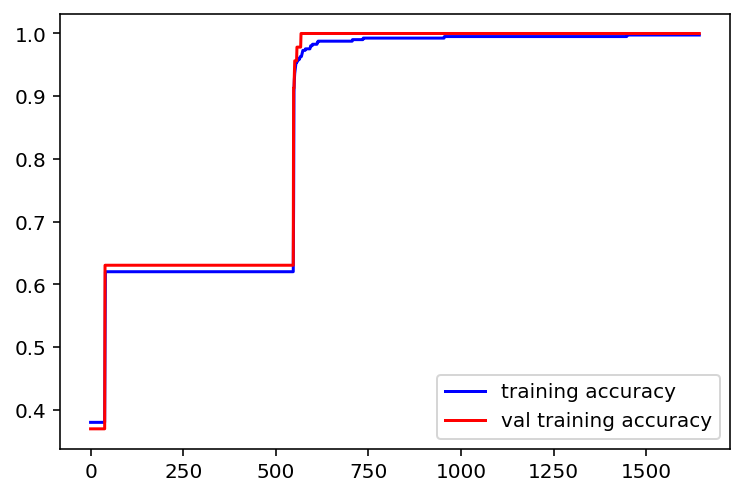

In [23]:
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']
plt.plot(accuracy_values,'b',label='training accuracy')
plt.plot(val_accuracy_values,'r',label='val training accuracy')
plt.legend()

In [24]:
y_test_cat = to_categorical(y_test)
loss, accuracy = model.evaluate(X_test, y_test_cat)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

114/114 [==============================] - 0s 80us/step
Test loss:  0.12863641617852345
Test accuracy:  0.9561403393745422


In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  0.9818803418803419


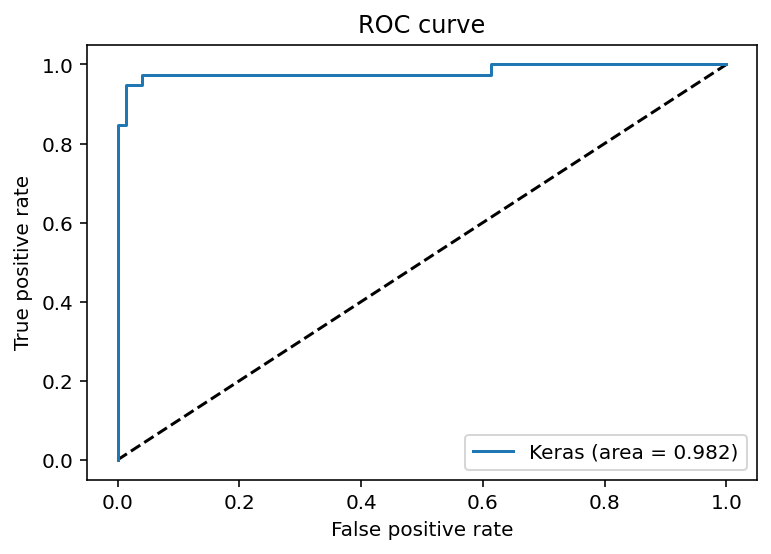

In [26]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [27]:
model = Sequential()
model.add(Dense(13,input_shape=(30,),activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(13, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [28]:
initial_weights = model.get_weights()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [30]:
train_sizes = (len(X_train) * np.linspace(0.1, 0.999, 4)).astype(int)
train_sizes

array([ 45, 181, 317, 453])

In [ ]:
train_scores = []
test_scores = []

for train_size in train_sizes:
    X_train_frac, _, y_train_frac, _ = \
    train_test_split(X_train, y_train, train_size=train_size)
    y_train_frac = to_categorical(y_train_frac)
    
    model.set_weights(initial_weights)
    
    h = model.fit(X_train_frac, y_train_frac,
                 verbose=0,
                 epochs = 1000,
                 callbacks = [EarlyStopping(monitor='loss', patience=20)])
    
    r = model.evaluate(X_train_frac, y_train_frac, verbose=0)
    train_scores.append(r[-1])